
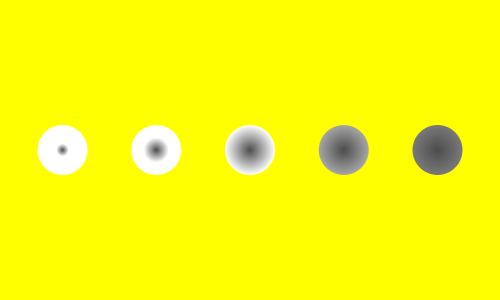

In [1]:
import gizeh as gz
import numpy as np

W, H = 500, 300
r, gray = 25., .3

surface = gz.Surface(W,H, bg_color=(1,1,0)) # yellow background

N = 5
for x, radius1 in zip(np.linspace(W/8., 7*W/8., N), np.logspace(-2, 2, N, base=2)*r):
    gradient = gz.ColorGradient(type="radial", stops_colors=[(0,(gray, gray, gray)), (1, (1, 1, 1))],
                                xy1=[0, 0], xy2=[0, 0], xy3=[0, radius1])
    gz.circle(r=r, xy=(x, H/2.), fill=gradient).draw(surface)
surface.ipython_display()

In [1]:
import gizeh
surface = gizeh.Surface(width=320, height=260) # dimensions in pixel
circle = gizeh.circle (r=40, # radius, in pixels
                       xy= [156, 200], # coordinates of the center
                       fill= (1,0,0)) # 'red' in RGB coordinates
circle.draw( surface ) # draw the circle on the surface
surface.get_npimage() # export as a numpy array (we will use that)
surface.write_to_png("my_drawing.png") # export as a PNG

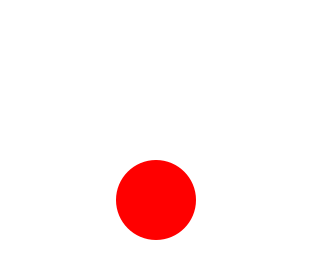

In [2]:
from PIL import Image
import IPython.display as display

# Open the image file
image = Image.open("my_drawing.png")

# Display the image using IPython.display
display.display(image)


In [4]:
import gizeh
from moviepy.editor import VideoClip
import numpy as np

# Create a function to generate the frame for the animation
def make_frame(t):
    surface = gizeh.Surface(width=320, height=260)  # Create a new surface for each frame
    radius = 40  # Radius of the circle
    x = 156  # X-coordinate of the circle's center
    y = 200 + 50 * np.sin(2 * np.pi * t)  # Y-coordinate with a sine wave animation
    circle = gizeh.circle(r=radius, xy=[x, y], fill=(1, 0, 0))
    circle.draw(surface)
    return surface.get_npimage()

# Create a VideoClip using the make_frame function
clip = VideoClip(make_frame, duration=3)  # 3-second animation

# Export the animation as a GIF
clip.write_gif("my_animation.gif", fps=24)  # export as GIF


MoviePy - Building file my_animation.gif with imageio.


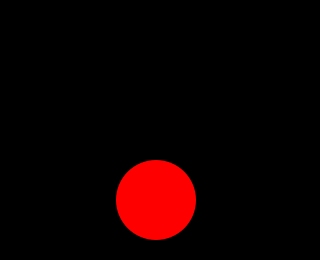

In [5]:
from PIL import Image
import IPython.display as display

# Open the image file
image = Image.open("my_animation.gif")

# Display the image using IPython.display
display.display(image)

# E1

In [6]:
import gizeh
import moviepy.editor as mpy

W,H = 128,128 # width, height, in pixels
duration = 2 # duration of the clip, in seconds

def make_frame(t):
    surface = gizeh.Surface(W,H)
    radius = W*(1+ (t*(duration-t))**2 )/6
    circle = gizeh.circle(radius, xy = (W/2,H/2), fill=(1,0,0))
    circle.draw(surface)
    return surface.get_npimage()

clip = mpy.VideoClip(make_frame, duration=duration)
clip.write_gif("circle.gif",fps=15, opt="OptimizePlus", fuzz=10)

MoviePy - Building file circle.gif with imageio.


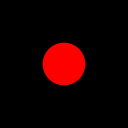

In [7]:
from PIL import Image
import IPython.display as display

# Open the image file
image = Image.open("circle.gif")

# Display the image using IPython.display
display.display(image)

In [9]:
import numpy as np
import gizeh
import moviepy.editor as mpy

W,H = 1280,720
duration = 2
ncircles = 20 # Number of circles

def make_frame(t):

    surface = gizeh.Surface(W,H)

    for i in range(ncircles):
        angle = 2*np.pi*(1.0*i/ncircles+t/duration)
        center = W*( 0.5+ gizeh.polar2cart(0.1,angle))
        circle = gizeh.circle(r= W*(1.0-1.0*i/ncircles),
                              xy= center, fill= (i%2,i%2,i%2))
        circle.draw(surface)

    return surface.get_npimage()

clip = mpy.VideoClip(make_frame, duration=duration)
clip.write_gif("circles.gif",fps=15, opt="OptimizePlus", fuzz=10)

MoviePy - Building file circles.gif with imageio.
